In [23]:
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [24]:
np.set_printoptions(formatter={'float': lambda x: '%.3f' % x})

# Resampling methods
## Resampling
 - Sampling with and without replacement
 - Bootstrap (using sampling with replacement)
 - Jackknife (using subsets)

## Setting the random seed

In [25]:
np.random.seed(555)

## Resampling
Sampling with and without replacement

In [26]:
# Sampling is done with replacement by default
np.random.choice(4, 12)

array([2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1])

In [27]:
# Probability weights can be given
np.random.choice(4, 12, p=[.4, .1, .1, .4])

array([3, 0, 3, 1, 0, 0, 0, 3, 3, 2, 0, 1], dtype=int64)

In [28]:
x = np.random.randint(0, 10, (8, 12))
x

array([[4, 7, 8, 3, 1, 4, 9, 1, 1, 8, 4, 0],
       [1, 4, 4, 0, 0, 2, 9, 1, 0, 3, 4, 5],
       [2, 1, 0, 0, 8, 2, 5, 9, 9, 0, 0, 3],
       [9, 8, 9, 6, 4, 5, 4, 7, 5, 7, 4, 7],
       [3, 3, 1, 3, 5, 1, 0, 0, 8, 1, 1, 3],
       [6, 6, 1, 4, 3, 5, 1, 4, 3, 6, 5, 4],
       [1, 6, 5, 2, 8, 0, 4, 1, 3, 7, 7, 0],
       [6, 7, 6, 1, 4, 0, 3, 4, 9, 2, 8, 6]])

In [29]:
# sampling individual elements
np.random.choice(x.ravel(), 12)

array([4, 1, 3, 3, 4, 9, 0, 9, 4, 0, 9, 1])

In [30]:
# sampling rows
idx = np.random.choice(x.shape[0], 4)
x[idx, :]

array([[4, 7, 8, 3, 1, 4, 9, 1, 1, 8, 4, 0],
       [9, 8, 9, 6, 4, 5, 4, 7, 5, 7, 4, 7],
       [9, 8, 9, 6, 4, 5, 4, 7, 5, 7, 4, 7],
       [6, 6, 1, 4, 3, 5, 1, 4, 3, 6, 5, 4]])

In [31]:
# sampling columns
idx = np.random.choice(x.shape[1], 4)
x[:, idx]

array([[4, 4, 1, 4],
       [2, 4, 0, 4],
       [2, 0, 8, 0],
       [5, 4, 4, 4],
       [1, 1, 5, 1],
       [5, 5, 3, 5],
       [0, 7, 8, 7],
       [0, 8, 4, 8]])

In [32]:
# Give the argument replace=False
try:
    np.random.choice(4, 12, replace=False)
except ValueError as e:
    print(e)

Cannot take a larger sample than population when 'replace=False'


You will likely have used this for the stochastic gradient descent homework.

In [33]:
x

array([[4, 7, 8, 3, 1, 4, 9, 1, 1, 8, 4, 0],
       [1, 4, 4, 0, 0, 2, 9, 1, 0, 3, 4, 5],
       [2, 1, 0, 0, 8, 2, 5, 9, 9, 0, 0, 3],
       [9, 8, 9, 6, 4, 5, 4, 7, 5, 7, 4, 7],
       [3, 3, 1, 3, 5, 1, 0, 0, 8, 1, 1, 3],
       [6, 6, 1, 4, 3, 5, 1, 4, 3, 6, 5, 4],
       [1, 6, 5, 2, 8, 0, 4, 1, 3, 7, 7, 0],
       [6, 7, 6, 1, 4, 0, 3, 4, 9, 2, 8, 6]])

In [34]:
# Shuffling occurs "in place" for efficiency
np.random.shuffle(x)
x

array([[4, 7, 8, 3, 1, 4, 9, 1, 1, 8, 4, 0],
       [6, 6, 1, 4, 3, 5, 1, 4, 3, 6, 5, 4],
       [1, 6, 5, 2, 8, 0, 4, 1, 3, 7, 7, 0],
       [1, 4, 4, 0, 0, 2, 9, 1, 0, 3, 4, 5],
       [2, 1, 0, 0, 8, 2, 5, 9, 9, 0, 0, 3],
       [9, 8, 9, 6, 4, 5, 4, 7, 5, 7, 4, 7],
       [6, 7, 6, 1, 4, 0, 3, 4, 9, 2, 8, 6],
       [3, 3, 1, 3, 5, 1, 0, 0, 8, 1, 1, 3]])

In [37]:
# To shuffle columns instead, transpose before shuffling
np.random.shuffle(x.T)
x

array([[8, 4, 0, 1, 7, 1, 8, 4, 1, 9, 3, 4],
       [1, 5, 4, 3, 6, 4, 6, 5, 3, 1, 4, 6],
       [5, 7, 0, 8, 6, 1, 7, 0, 3, 4, 2, 1],
       [4, 4, 5, 0, 4, 1, 3, 2, 0, 9, 0, 1],
       [0, 0, 3, 8, 1, 9, 0, 2, 9, 5, 0, 2],
       [9, 4, 7, 4, 8, 7, 7, 5, 5, 4, 6, 9],
       [6, 8, 6, 4, 7, 4, 2, 0, 9, 3, 1, 6],
       [1, 1, 3, 5, 3, 0, 1, 1, 8, 0, 3, 3]])

In [35]:
# numpy.random.permutation does the same thing but returns a copy
np.random.permutation(x)

array([[4, 7, 8, 3, 1, 4, 9, 1, 1, 8, 4, 0],
       [6, 6, 1, 4, 3, 5, 1, 4, 3, 6, 5, 4],
       [1, 4, 4, 0, 0, 2, 9, 1, 0, 3, 4, 5],
       [3, 3, 1, 3, 5, 1, 0, 0, 8, 1, 1, 3],
       [1, 6, 5, 2, 8, 0, 4, 1, 3, 7, 7, 0],
       [2, 1, 0, 0, 8, 2, 5, 9, 9, 0, 0, 3],
       [6, 7, 6, 1, 4, 0, 3, 4, 9, 2, 8, 6],
       [9, 8, 9, 6, 4, 5, 4, 7, 5, 7, 4, 7]])

In [38]:
# When given an integre n, permutation treats is as the array arange(n)
np.random.permutation(10)

array([2, 8, 5, 6, 7, 3, 9, 1, 0, 4])

In [39]:
# Use indices if you needed to shuffle collections of arrays in synchrony
x = np.arange(12).reshape(4,3)
y = x + 10
idx = np.random.permutation(x.shape[0])
print(x[idx, :], '\n') 
print(y[idx, :]) 

[[ 9 10 11]
 [ 3  4  5]
 [ 6  7  8]
 [ 0  1  2]] 

[[19 20 21]
 [13 14 15]
 [16 17 18]
 [10 11 12]]


# Bootstrap
The bootstrap is commonly used to estimate statistics when theory fails. We have already seen the bootstrap for estiamting confidence bounds for convergence in the Monte Carlo integration.

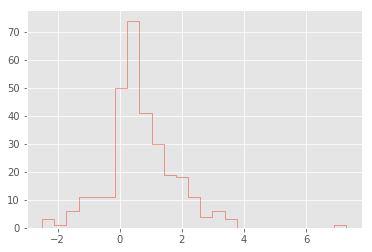

In [40]:
# For example, what is the 95% confidence interval for
# the mean of this data set if you didn't know how it was generated?

x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step');

In [41]:
n = len(x)
reps = 10000
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()

np.percentile(mb, [2.5, 97.5])

array([0.560, 0.812])

## Reprise of bootstrap example for Monte Carlo integration

In [42]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

In [43]:
# data sample for integration
n = 100
x = f(np.random.random(n))

In [44]:
# bootstrap MC integration
reps = 1000
xb = np.random.choice(x, (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)

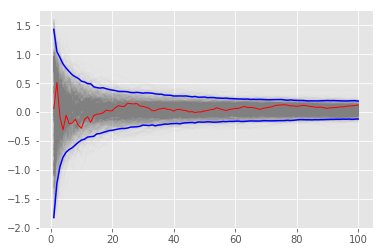

In [45]:
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

# Leave some-out resampling
## Jackknife estimate of parameters
This shows the leave-one-out calculation idiom for Python. Unlike R, a -k index to an array does not delete the kth entry, but returns the kth entry from the end, so we need another way to efficiently drop one scalar or vector. This can be done using Boolean indexing as shown in the examples below, and is efficient since the operations are on views of the origianl array rather thna copies

In [48]:
def jackknife(x, func):
    """Jackknife estimate of the estimator func"""
    n = len(x)
    idx = np.arange(n)
    return np.sum(func(x[idx!=i]) for i in range(n))/float(n)

In [49]:
# Jackknife estimate of standard deviation
x = np.random.normal(0, 2, 100)
jackknife(x, np.std)

2.138670452505575

In [51]:
def jackknife_var(x, func):
    """Jackknife estiamte of the variance of the estimator func."""
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, func)
    return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0
                                    for i in range(n))

In [52]:
# estimate of the variance of an estimator
jackknife_var(x, np.std)

0.025380929086634425